# DESAFIO 2 - Solução.

### Incluir comentário.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#https://www.rpubs.com/dksmith01/cars

In [26]:
#datasets = sns.get_dataset_names()
#dataset = sns.load_dataset('mpg')
#dataset.isnull().values.any()
#datasets

#### Exercício 1:  Faça a leitura inicial dos dados e explore suas informações, estude seus tipos, sua forma e apresente uma análise inicial das medidas de dispersão de seus atributos.

In [27]:
autoIndustryDF = pd.read_csv('auto_industry.csv', encoding = 'UTF-8')
autoIndustryDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [28]:
autoIndustryDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [29]:
autoIndustryDF.shape

(398, 9)

In [30]:
autoIndustryDF.describe(include = 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,NaN,NaN


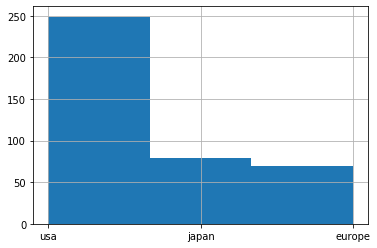

In [31]:
autoIndustryDF['origin'].hist(bins = 3)

#### Exercício 2:  Procure por valores faltantes nas colunas do dataframe e faça as substituições mais razoáveis.

In [32]:
#autoIndustryDF['cylinders'].isnull().values.any()
#autoIndustryDF['displacement'].isnull().values.any()
#autoIndustryDF['horsepower'].isnull().values.any()
#autoIndustryDF['weight'].isnull().values.any()
#autoIndustryDF['weight'].isnull().values.any()
#autoIndustryDF['acceleration'].isnull().values.any()
#autoIndustryDF['model_year'].isnull().values.any()
#autoIndustryDF['origin'].isnull().values.any()

In [33]:
autoIndustryDF['horsepower'] = autoIndustryDF['horsepower'].fillna(autoIndustryDF['horsepower'].median())

#### Exercício 3: Explore a função [`get_group()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html) para criar um subconjunto dos dados e analisar apenas as entradas referentes à `'origin' = usa`.

In [34]:
originautoIndustryDF = autoIndustryDF.groupby('origin') 
originautoIndustryDF.first() 
originautoIndustryDF.get_group('usa') 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino
...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,chevrolet camaro
393,27.0,4,140.0,86.0,2790,15.6,82,ford mustang gl
395,32.0,4,135.0,84.0,2295,11.6,82,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,ford ranger


#### Exercício 4: Remova os elementos duplicados e crie uma tabela de consumo em (Km/L) e altere os nomes dos países de orígem para que todos comecem com letras maiúsculas.

In [35]:
autoIndustryDF.drop_duplicates()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [36]:
autoIndustryDF['KmpL'] = autoIndustryDF['mpg']* (1.61/4.55)
autoIndustryDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,KmpL
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,6.369231
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,5.307692
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,6.369231
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,5.661538
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,6.015385


In [52]:
autoIndustryDF['origin'] = autoIndustryDF['origin'].map(lambda x: x.title())
autoIndustryDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,KmpL
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet chevelle malibu,6.369231
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick skylark 320,5.307692
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth satellite,6.369231
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc rebel sst,5.661538
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford torino,6.015385


#### Exercício 5:  Imprima as matrizes de covariância e de correlação do dataframe e avalie as relações entre os atributos.

In [37]:
print('Covariance:')
autoIndustryDF.cov()

Covariance:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,KmpL
mpg,61.089611,-10.308911,-655.402318,-231.067162,-5505.211745,9.058930,16.741163,21.616324
cylinders,-10.308911,2.893415,168.623214,54.697663,1290.695575,-2.370842,-2.193499,-3.647769
displacement,-655.402318,168.623214,10872.199152,3570.094379,82368.423240,-156.332976,-142.717137,-231.911589
horsepower,-231.067162,54.697663,3570.094379,1460.969052,27915.978893,-72.370753,-58.474096,-81.762227
weight,-5505.211745,1290.695575,82368.423240,27915.978893,717140.990526,-974.899011,-959.946344,-1947.998002
acceleration,9.058930,-2.370842,-156.332976,-72.370753,-974.899011,7.604848,2.938105,3.205467
model_year,16.741163,-2.193499,-142.717137,-58.474096,-959.946344,2.938105,13.672443,5.923796
KmpL,21.616324,-3.647769,-231.911589,-81.762227,-1947.998002,3.205467,5.923796,7.648853


In [38]:
print('Correlation:')
autoIndustryDF.corr()

Correlation:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,KmpL
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,1.000000
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.775396
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.804203
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.773453
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.831741
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.420289
model_year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.579267
KmpL,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,1.000000


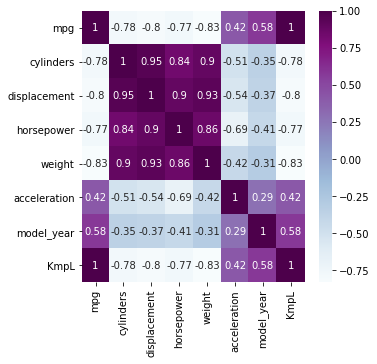

In [39]:
plt.figure(figsize = (5,5))
sns.heatmap(autoIndustryDF.corr(),
            cmap = 'BuPu',
            annot = True);

#### Exercício 6: Gere gráficos de boxplots para todos os elementos numéricos do dataframe.

IndexError: index 7 is out of bounds for axis 0 with size 7

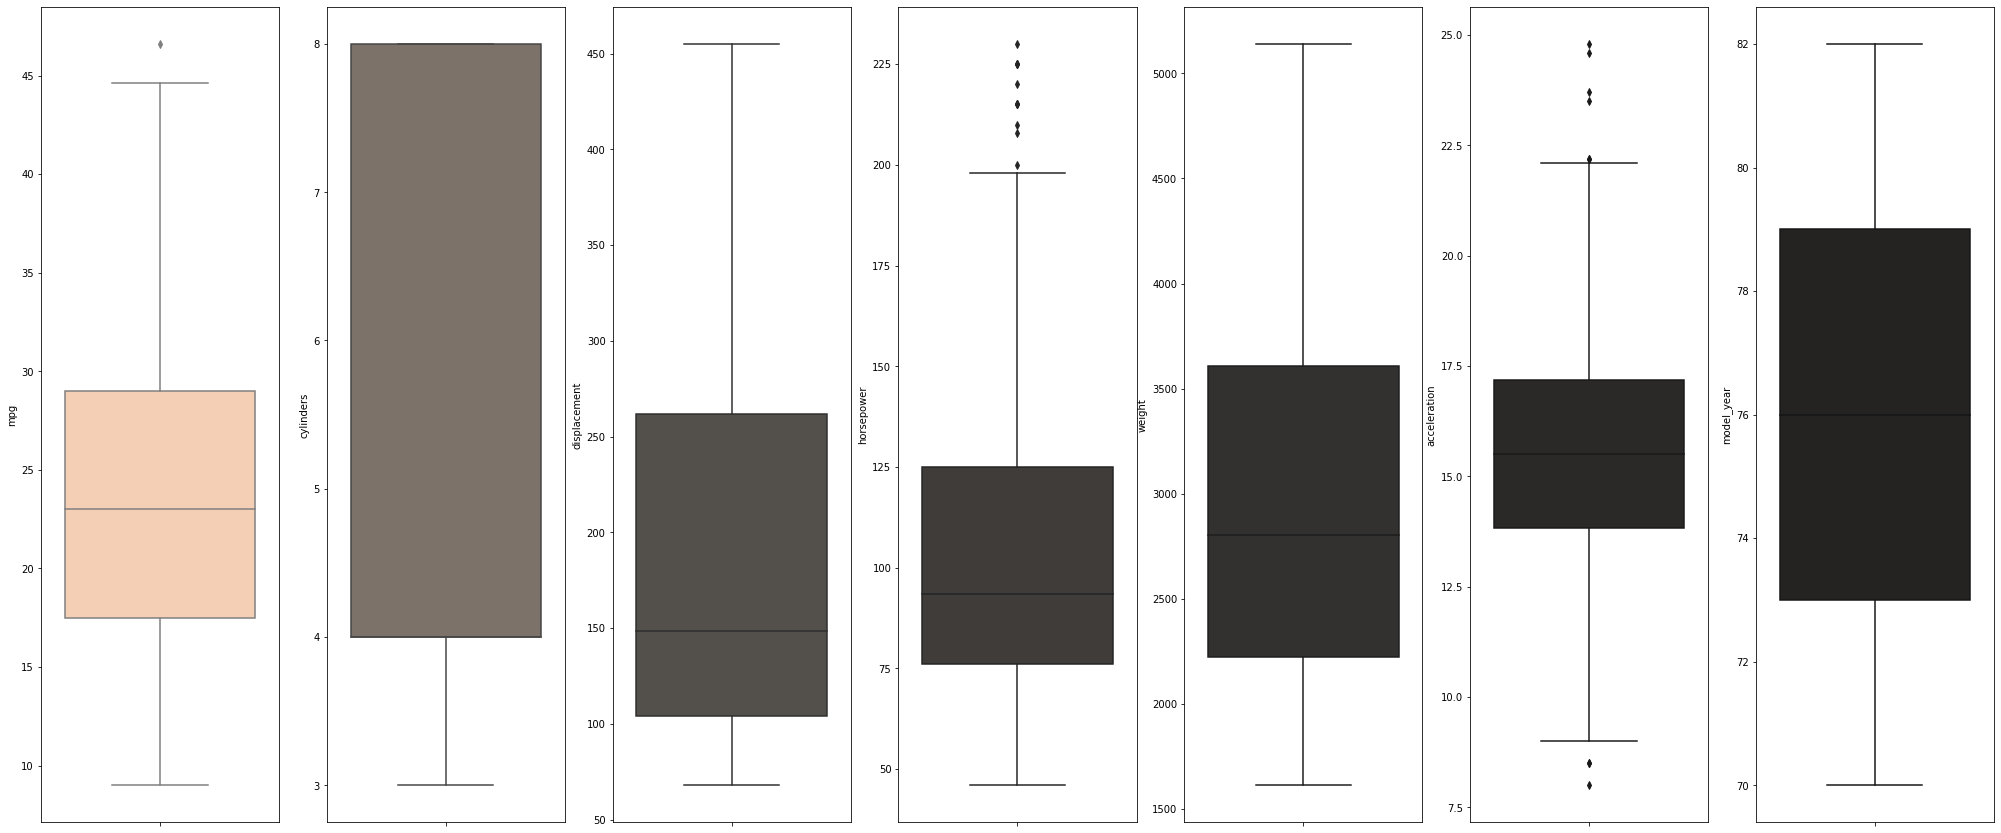

In [41]:
import seaborn as sns
df1 = autoIndustryDF.drop(columns = ['origin', 'name'])

f, a = plt.subplots(nrows = 1, ncols = 7, figsize = (35, 15))

for i, key in enumerate(df1.columns[0:]):
    sns.boxplot(y = key, data = df1, orient = 'v', color = (1/(1 + i), 1/(1.25 + i), 1/(1.5 + i)), ax = a[i])

#### Exercicio 7: Eliminando os elementos `'origin'`, `'name'`, `'model_year'`, calcule a matriz de correlação entre atributos remanecentes, incluindo apenas aquelas correlações que em módulo superam o corte de `0.8`, discuta tamb;em suas relações de proporcionalidade.

#### Calculando o pairplot das relações remanecentes.

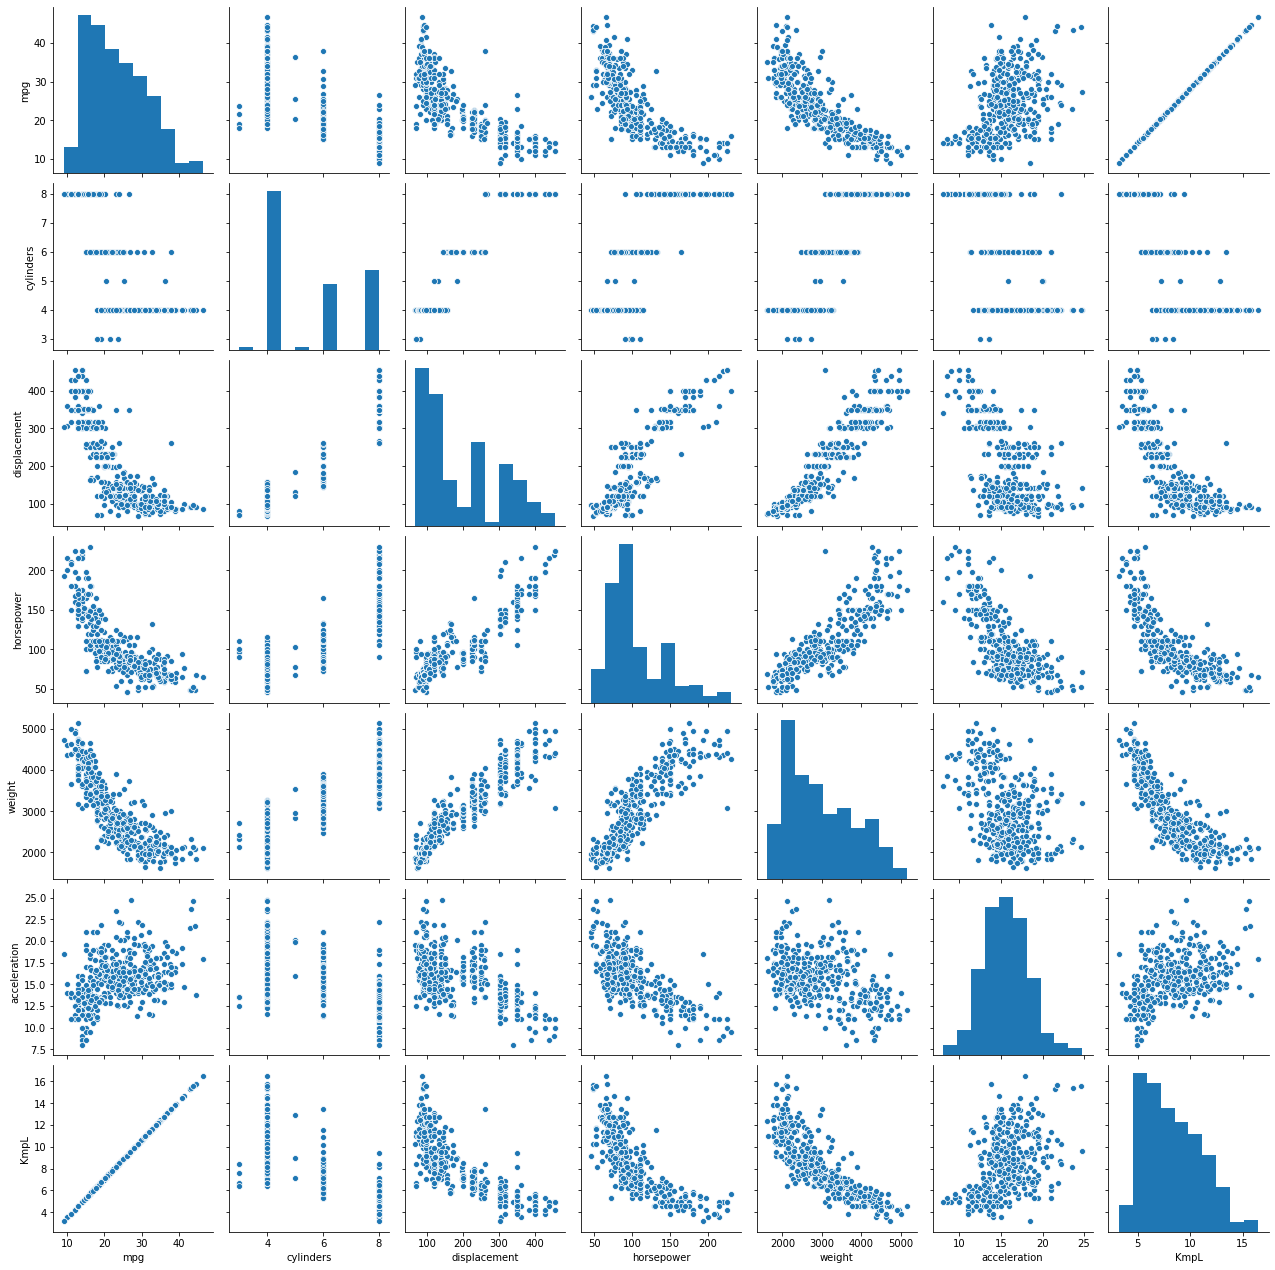

In [42]:
df2 = autoIndustryDF.drop(columns = ['origin', 'name', 'model_year'])
sns.pairplot(df2)

#### Calculando aogra a matriz de correlação entre os elementos cujas correlações superam o corte proposto.

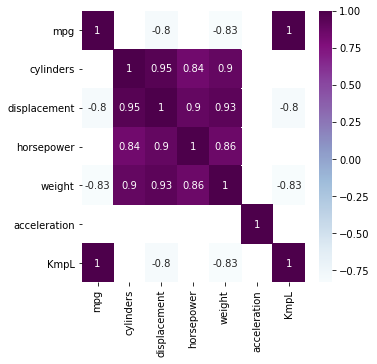

In [43]:
corr = df2.corr()
kot = corr[abs(corr) >= 0.80]

plt.figure(figsize = (5,5))
sns.heatmap(kot,
            cmap = 'BuPu',
            annot = True);

In [44]:
autoIndustryDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,KmpL
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,6.369231
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,5.307692
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,6.369231
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,5.661538
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,6.015385


#### Exercicio 8: Use a função [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) para criar uma tabela dinâmica que calcule a média do consumo (miles/galon) `'mpg'`. Divida o dataframe em ano de modelo `'model_year'` e número de cilindros `'cylinders'`. Estude e descreva os resultados.

In [45]:
autoIndustryDF.pivot_table('mpg', index = 'model_year', columns = 'cylinders', aggfunc = 'mean')

cylinders,3,4,5,6,8
model_year,,,,,
70,NaN,25.285714,NaN,20.500000,14.111111
71,NaN,27.461538,NaN,18.000000,13.428571
72,19.0,23.428571,NaN,NaN,13.615385
73,18.0,22.727273,NaN,19.000000,13.200000
74,NaN,27.800000,NaN,17.857143,14.200000
75,NaN,25.250000,NaN,17.583333,15.666667
76,NaN,26.766667,NaN,20.000000,14.666667
77,21.5,29.107143,NaN,19.500000,16.000000
78,NaN,29.576471,20.3,19.066667,19.050000


#### Exercício 9: Agrupe o dataframe por origem  `'origin'` e número cilindros `'cylinders'` e calcule a média da potência `'horsepower'` dos carros fabricados.

In [46]:
autoIndustryDF.groupby(['origin','cylinders'])[['horsepower']].mean()

horsepower
origin cylinders            
europe 4           78.793651
       5           82.333333
       6          113.500000
japan  3           99.250000
       4           75.579710
       6          115.833333
usa    4           81.479167
       6           99.587838
       8          158.300971

#### Exercício 10: Faça uma segregação ainda mais severa com os dados, criando uma lista de intervalos de anos (dois a dois) como corte para a leitura da média de consumo dos veículos produzidos, como agrupados por origem `'origin'`, ano de modelo `'year_model'` e número de cilindros `'cylinders'`. Discuta a evolução na média de consumo, por ano e por país e por cilindro.

In [47]:
year = pd.cut(autoIndustryDF['model_year'], [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])
autoIndustryDF.pivot_table('mpg', 
                           ['origin', 'cylinders'], 
                           year, 
                           aggfunc = 'mean' 
                          )

model_year         (70, 71]   (71, 72]   (72, 73]   (73, 74]   (74, 75]  \
origin cylinders                                                          
europe 4          28.750000  22.000000  24.000000  27.000000  24.500000   
       5                NaN        NaN        NaN        NaN        NaN   
       6                NaN        NaN        NaN        NaN        NaN   
japan  3                NaN  19.000000  18.000000        NaN        NaN   
       4          29.500000  25.500000  21.000000  29.333333  27.500000   
       6                NaN        NaN  20.000000        NaN        NaN   
usa    4          24.800000  23.200000  20.000000  26.333333  23.000000   
       6          18.000000        NaN  18.857143  17.857143  17.583333   
       8          13.428571  13.615385  13.200000  14.200000  15.666667   

model_year         (75, 76]  (76, 77]   (77, 78]   (78, 79]   (79, 80]  \
origin cylinders                                                         
europe 4          25.357143    29.250  32.066667  32.133333  37.400000   
       5                NaN       NaN  20.300000  25.400000  36.400000   
       6          16.500000       NaN  16.600000        NaN        NaN   
japan  3                NaN    21.500        NaN        NaN  23.700000   
       4          31.000000    30.250  29.687500  32.950000  36.709091   
       6          19.000000    22.000        NaN        NaN  32.700000   
usa    4          26.200000    28.250  28.183333  30.857143  27.050000   
       6          20.562500    18.875  19.560000  22.950000  19.100000   
       8          14.666667    16.000  19.050000  18.630000        NaN   

model_year         (80, 81]   (81, 82]  
origin cylinders                        
europe 4          31.866667  40.000000  
       5                NaN        NaN  
       6          30.700000        NaN  
japan  3                NaN        NaN  
       4          34.590000  34.888889  
       6          24.800000        NaN  
usa    4          30.950000  29.647059  
       6          20.925000  28.333333  
       8          26.600000        NaN

#### Exercício 11: Crie uma nova coluna que reflita a região mundial em que as origens dos veículos se encontram, certifique-se de que essa coluna também conterá valores que começam com letras maiúsculas.

In [62]:
autoIndustryDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,KmpL,region
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet chevelle malibu,6.369231,North America
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick skylark 320,5.307692,North America
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth satellite,6.369231,North America
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc rebel sst,5.661538,North America
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford torino,6.015385,North America


In [63]:
autoIndustryDF['origin'].unique()

array(['Usa', 'Japan', 'Europe'], dtype=object)

In [64]:
country_to_region = { 
    'Usa': 'North America',
    'Japan': 'Asia',
    'Europe': 'Europe',    
}

In [65]:
autoIndustryDF['region'] = autoIndustryDF['origin'].map(country_to_region)
#autoIndustryDF['region'] = autoIndustryDF['region'].map(str.title)
autoIndustryDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,KmpL,region
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet chevelle malibu,6.369231,North America
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick skylark 320,5.307692,North America
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth satellite,6.369231,North America
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc rebel sst,5.661538,North America
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford torino,6.015385,North America


#### Exercício 12: Crie uma nova coluna com a relação peso/potência para cada veículo e plote um gráfico de dispersão dessa coluna com a de consumo que você criou no exercício 4

In [81]:
autoIndustryDF['weight/horsepower'] = autoIndustryDF['weight']/autoIndustryDF['horsepower']
autoIndustryDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,KmpL,region,weight/horsepower
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet chevelle malibu,6.369231,North America,26.953846
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick skylark 320,5.307692,North America,22.381818
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth satellite,6.369231,North America,22.906667
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc rebel sst,5.661538,North America,22.886667
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford torino,6.015385,North America,24.635714


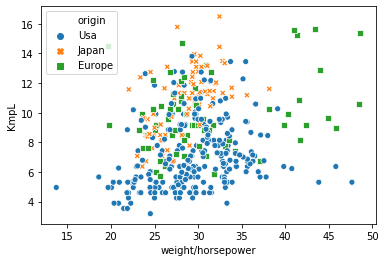

In [75]:
#ax = sns.scatterplot(x = "weight/horsepower", y = "KmpL", data = autoIndustryDF)

ax = sns.scatterplot(x = "weight/horsepower", 
                     y = "KmpL", 
                     hue = "origin", 
                     style = "origin", 
                     data = autoIndustryDF
                    )

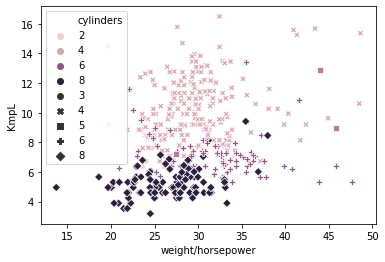

In [74]:
ax = sns.scatterplot(x = "weight/horsepower", 
                     y = "KmpL", 
                     hue = "cylinders", 
                     style = "cylinders", 
                     data = autoIndustryDF
                    )

In [84]:
autoIndustryDF.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,KmpL,weight/horsepower
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,8.320541,29.487908
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,2.765656,5.067188
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,3.184615,13.715556
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,6.192308,26.199903
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,8.138462,29.167017
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,10.261538,32.413895
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,16.489231,48.645833
